# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 :  Loading the Dataset(Netflix)

In [2]:
netflix_df = pd.read_csv("netflix daily top 10.csv")

In [3]:
netflix_df

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [4]:
netflix_df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Exclusive', 'Netflix Release Date', 'Days In Top 10',
       'Viewership Score'],
      dtype='object')

# Step 2 : Data Profilling and Cleaning

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [6]:
print("\nColumns with missing value\n") 
print(netflix_df.isnull().any())


Columns with missing value

As of                   False
Rank                    False
Year to Date Rank       False
Last Week Rank          False
Title                   False
Type                    False
Netflix Exclusive        True
Netflix Release Date    False
Days In Top 10          False
Viewership Score        False
dtype: bool


# Handling Null-Values

In [7]:
# There are a few columns that contain null values,to get the total no of null value columns we use isnull()+sum()+sum() method

netflix_df.isnull().sum().sum()

# There are no NULL values in the dataset, hence it is clean.

2501

In [8]:
# count the no of null values in each column,to get this by using isnull()+sum() method

netflix_df.isnull().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

In [9]:
# We will have to handle all null data points before we can going into EDA.

# Imputation treatement method is uesd for filling the missing values
# here we used the fillna() to fill the missing values

# netflix_df.Netflix Exclusive.fillna("No Exclusive",inplace=True)

# I drop the Netflix Exclusive column because only this column contains the null values and they are not 
# relevant to today's data analysis.

netflix_df.drop(columns=['Netflix Exclusive'],inplace=True)

In [10]:
# After removing 'Netflix Exclusive column,to check the remaining columns'

netflix_df.columns

Index(['As of', 'Rank', 'Year to Date Rank', 'Last Week Rank', 'Title', 'Type',
       'Netflix Release Date', 'Days In Top 10', 'Viewership Score'],
      dtype='object')

In [11]:
# again,check if any columns have null values

netflix_df.isnull().any()

As of                   False
Rank                    False
Year to Date Rank       False
Last Week Rank          False
Title                   False
Type                    False
Netflix Release Date    False
Days In Top 10          False
Viewership Score        False
dtype: bool

# Step 3 : EDA and Visualization

In [12]:
# it counts the diffrent categories in Type column

netflix_df.Type.value_counts()

TV Show            4446
Movie              2611
Stand-Up Comedy      41
Concert/Perf…         2
Name: Type, dtype: int64

Text(0.5, 1.0, '\nViewerShip Score between Movies and TVshows\n\n')

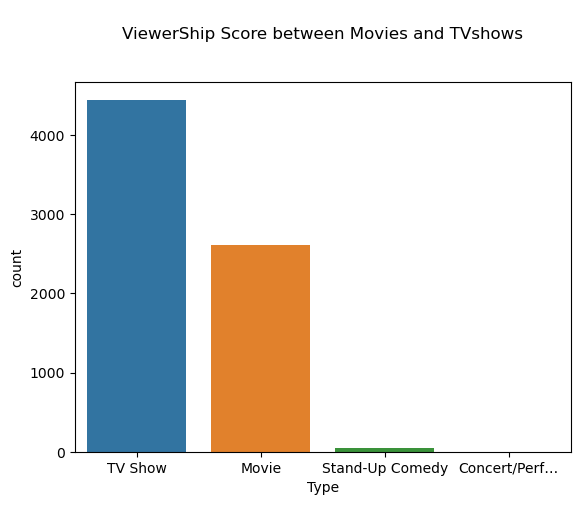

In [13]:
# Compare the total number of movies and TVshows in this dataset to know which one is the majority.
# 1.Barchart

sns.countplot(x='Type',data=netflix_df)
plt.title("\nViewerShip Score between Movies and TVshows\n\n")

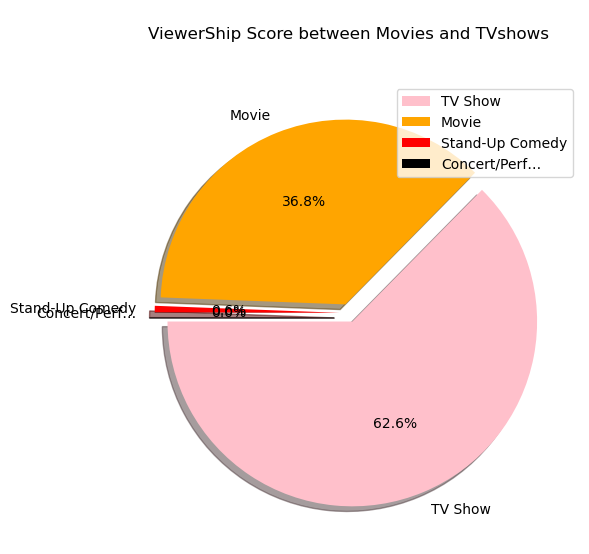

In [14]:
# 2.Pie chart

plt.figure(figsize=(12,6))
plt.title("\nViewerShip Score between Movies and TVshows\n\n")
plt.pie(netflix_df.Type.value_counts(),
        labels=netflix_df.Type.value_counts().index,
        colors=['Pink','Orange','Red','Black'],
        explode=(0.05,0.05,0.05,0.05),
        autopct='%1.1f%%',
        startangle=180,
        shadow=True)
plt.legend()
plt.show()

In [14]:
# Top 10 shows on Netflix
# Combining both Movies/Tv Shows

netflix_df.Title.value_counts().head(10)

Cocomelon               428
Ozark                    85
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             58
Bridgerton               58
Lucifer                  56
Name: Title, dtype: int64

Text(0.5, 1.0, '\n\nMost Watched (Movie and TVShows) on Netflix\n\n')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


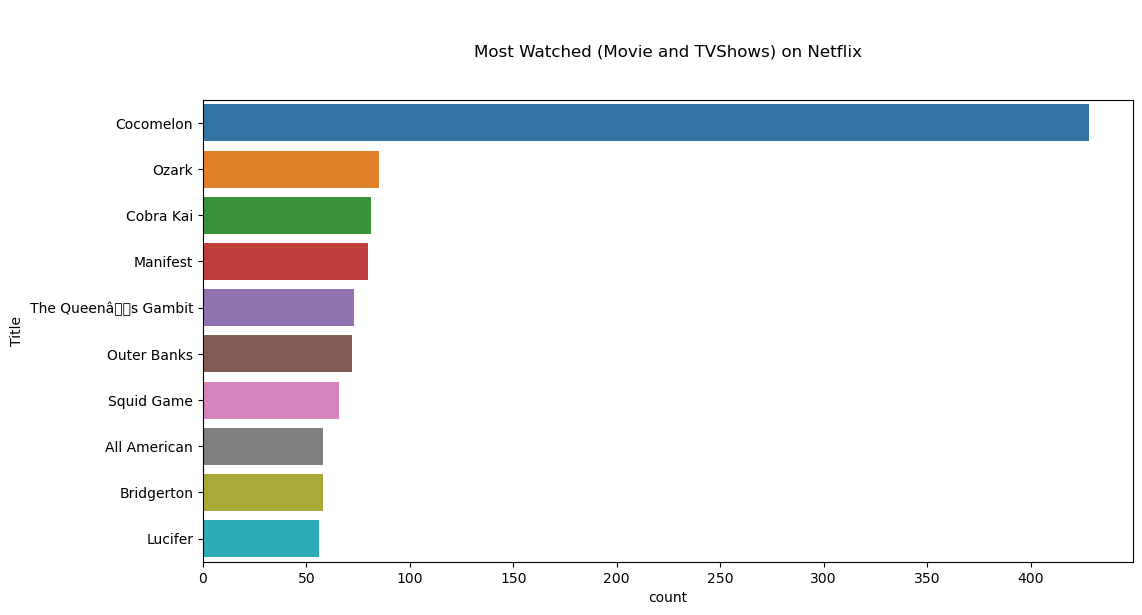

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(y="Title",order=netflix_df["Title"].value_counts().index[0:10],data=netflix_df)
plt.title("\n\nMost Watched (Movie and TVShows) on Netflix\n\n")

In [15]:
netflix_df.Rank.value_counts().head(10)

1     710
2     710
3     710
4     710
5     710
6     710
7     710
8     710
9     710
10    710
Name: Rank, dtype: int64

In [18]:
netflix_df.Rank.value_counts().tail(10)

1     710
2     710
3     710
4     710
5     710
6     710
7     710
8     710
9     710
10    710
Name: Rank, dtype: int64

Text(0.5, 1.0, '\n\nReleases in year and date wise\n\n')

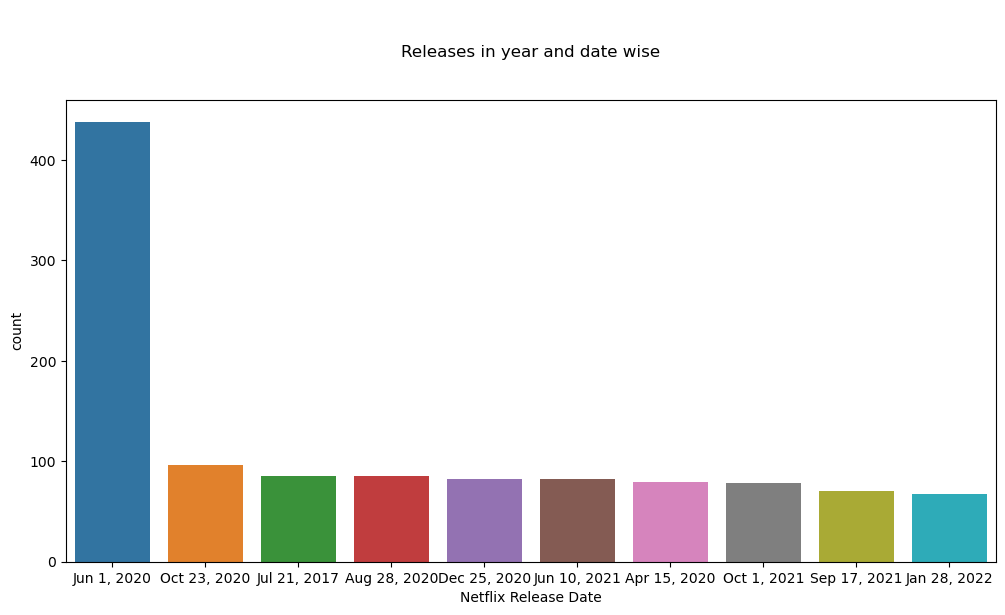

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x="Netflix Release Date",order=netflix_df["Netflix Release Date"].value_counts().index[0:10],data=netflix_df)
plt.title("\n\nReleases in year and date wise\n\n")

In [21]:
# Next, we will explore the amount of content Netflix has added throughout the previous years. 
# Since we are interested in when Netflix added the title onto their platform, we will add a "year_added" column to show the year of the date from the 
# "Netflix Release Date" columns.

netflix_movies_df = netflix_df[netflix_df.Type.str.contains("Movie")]

In [33]:
netflix_tvshows_df = netflix_df[netflix_df.Type.str.contains("TV Show")]

In [35]:
netflix_df.year_added = pd.DatetimeIndex(netflix_df["Netflix Release Date"]).year
netflix_movies_df.year_added = pd.DatetimeIndex(netflix_movies_df["Netflix Release Date"]).year
netflix_tvshows_df.year_added = pd.DatetimeIndex(netflix_tvshows_df["Netflix Release Date"]).year

C:\Users\user\AppData\Local\Temp\ipykernel_9848\3426412702.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  netflix_tvshows_df.year_added = pd.DatetimeIndex(netflix_tvshows_df["Netflix Release Date"]).year


In [36]:
netflix_year_df = netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
netflix_year_df = netflix_year_df[netflix_year_df.year != 2023]

In [38]:
netflix_year_df

,year,Netflix Release Date
0,2020,2881
1,2021,2538
2,2019,417
3,2018,353
4,2022,340
5,2017,280
6,2016,120
7,2015,96
8,2014,67
9,2013,7


In [39]:
movies_year_df = netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
movies_year_df = movies_year_df[movies_year_df != 2023]

In [40]:
movies_year_df

,year,Netflix Release Date
0,2021,1272
1,2020,1016
2,2022,156
3,2018,44
4,2019,32
5,2017,29
6,2014,23
7,2016,16
8,2015,16
9,2013,7


In [42]:
tvshows_year_df = netflix_tvshows_df.year_added.value_counts().to_frame().reset_index().rename(columns={"index": "year", "year_added":"count"})
tvshows_year_df = tvshows_year_df[tvshows_year_df != 2023]

In [43]:
tvshows_year_df

,year,Netflix Release Date
0,2020,1840
1,2021,1248
2,2019,385
3,2018,309
4,2017,251
5,2022,184
6,2016,104
7,2015,80
8,2014,44
9,2007,1


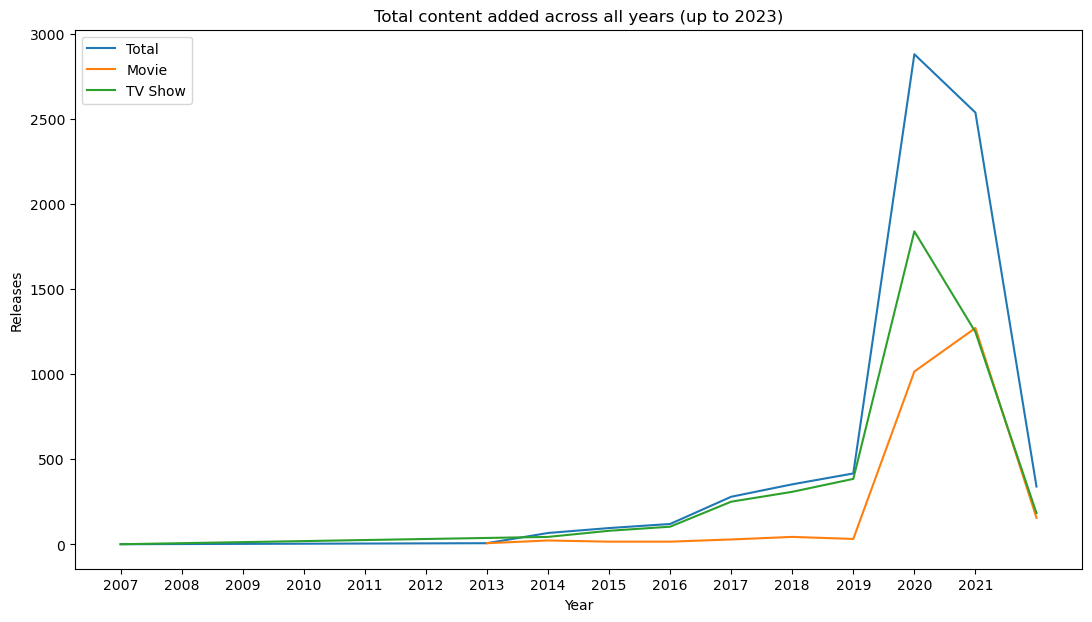

In [50]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.lineplot(data=netflix_year_df, x="year", y="Netflix Release Date")
sns.lineplot(data=movies_year_df, x="year", y="Netflix Release Date")
sns.lineplot(data=tvshows_year_df, x="year", y="Netflix Release Date")
ax.set_xticks(np.arange(2007,2023, 1))
plt.title("Total content added across all years (up to 2023)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Based on the timeline above, we can conclude that the popular streaming platform started gaining traction after 2019.Since the amount of content added has been increasing significantly and after(2020) decreasing. 

In [52]:
# from Netflix Release Date

date = pd.DataFrame(netflix_df["Netflix Release Date"].value_counts().reset_index().values, columns=["Date", "Count"])

In [53]:
date

,Date,Count
0,"Jun 1, 2020",438
1,"Oct 23, 2020",96
2,"Jul 21, 2017",85
3,"Aug 28, 2020",85
4,"Dec 25, 2020",82
...,...,...
409,"Nov 28, 2021",1
410,"Dec 1, 2017",1
411,"Jan 15, 2007",1
412,"Nov 22, 2020",1


In [54]:
date.head()

,Date,Count
0,"Jun 1, 2020",438
1,"Oct 23, 2020",96
2,"Jul 21, 2017",85
3,"Aug 28, 2020",85
4,"Dec 25, 2020",82


In [55]:
date.tail()

,Date,Count
409,"Nov 28, 2021",1
410,"Dec 1, 2017",1
411,"Jan 15, 2007",1
412,"Nov 22, 2020",1
413,"May 8, 2013",1


# Inferences and Conclusion

1. The most content type in Netflix is TVShows.
2. The popular streaming platform started after 2019.the amount of content added has been increasing significantly.
   but after 2020 it is decreasing.
3. Stand-up-comedy and concert are less in Netflix.
4. Movies releasing is greater in 2021 and lesser in 2013.
5. TVShow streaming is greater in 2020 and lesser in 2007.

# References

1. Netflix Dataset
2. Tutorials point(pandas,seaborn,matplotlib)
3. W3school(pandas,seaborn,matplotlib)
4. Google for EDA
5. Youtube for EDA